In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 8.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from pandas_datareader import data as pdr

In [5]:
df = pd.read_csv('Iris.csv', sep=',', encoding = 'latin-1')
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df['SepalLengthCm-SepalWidthCm']=df.SepalLengthCm-df.SepalWidthCm
df['PetalLengthCm-PetalWidthCm']=df.PetalLengthCm-df.PetalWidthCm
df=df.dropna()
X=df[['SepalLengthCm-SepalWidthCm','PetalLengthCm-PetalWidthCm']]
X.head()

,SepalLengthCm-SepalWidthCm,PetalLengthCm-PetalWidthCm
0,1.6,1.2
1,1.9,1.2
2,1.5,1.1
3,1.5,1.3
4,1.4,1.2


In [7]:
Y=np.where(df['PetalWidthCm'].shift(-1)>df['PetalWidthCm'],1,-1)
Y

array([-1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1,
       -1, -1, -1,  1, -1,  1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1, -1,
        1, -1, -1,  1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1,  1,
       -1, -1,  1, -1,  1, -1,  1,  1, -1,  1, -1,  1, -1,  1,  1, -1,  1,
       -1,  1, -1,  1, -1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1, -1,  1,
       -1, -1, -1, -1, -1,  1, -1, -1,  1, -1,  1, -1, -1,  1,  1, -1,  1,
       -1,  1, -1, -1,  1, -1,  1, -1, -1,  1, -1,  1, -1, -1,  1,  1, -1,
        1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1,  1,  1, -1, -1,  1,  1,
       -1, -1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1, -1, -1])

In [8]:
split_percentage=0.7
split=int(split_percentage*len(df))
X_train=X[:split]
Y_train=Y[:split]

X_test=X[split:]
Y_test=Y[split:]


In [9]:
Knn=KNeighborsClassifier(n_neighbors=5)
Knn.fit(X_train,Y_train)
accuracy_train=accuracy_score(Y_train,Knn.predict(X_train))
accuracy_test=accuracy_score(Y_test,Knn.predict(X_test))
print('Train Data Accuracy: %2f'%accuracy_train)
print('Test Data Accuracy: %2f'%accuracy_test)


Train Data Accuracy: 0.742857
Test Data Accuracy: 0.488889


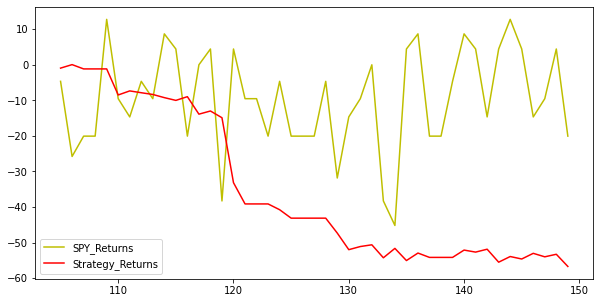

In [10]:
df['predicted_Signal']=Knn.predict(X)
df['SPY_Returns']=np.log(df['PetalWidthCm']/df['PetalWidthCm'].shift(1))
Cumulative_SPY_Returns=df[split:]['SPY_Returns'].cumsum()*100

df['Strategy_Returns']=df['SPY_Returns']* df['SPY_Returns'].shift(1)
Cumulative_Strategy_Returns=df[split:]['Strategy_Returns'].cumsum()*100

plt.figure(figsize=(10,5))
plt.plot(Cumulative_SPY_Returns, color='y',label='SPY_Returns')
plt.plot(Cumulative_Strategy_Returns, color='r',label='Strategy_Returns')
plt.legend()
plt.show()